# Importing modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [9]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [10]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [11]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### converting date column

In [12]:
re_df['date'] = re_df['date'].dt.to_period('M')

In [13]:
re_df['date'] = re_df['date'].dt.strftime('%m/%Y')

In [14]:
re_df['date'].value_counts()

04/2015    2229
07/2014    2211
06/2014    2178
08/2014    1939
10/2014    1876
03/2015    1875
09/2014    1771
05/2014    1768
12/2014    1470
11/2014    1409
02/2015    1247
01/2015     978
05/2015     646
Name: date, dtype: int64

### houses sold by month

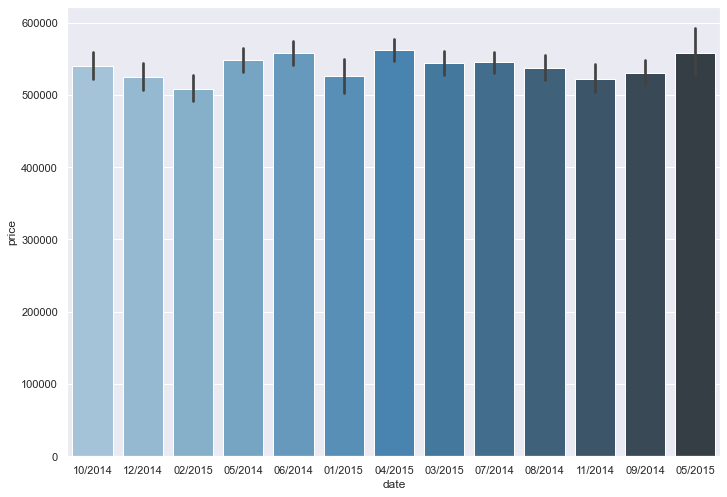

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="date", y="price", data=re_df, palette="Blues_d")

NameError: name 'months' is not defined

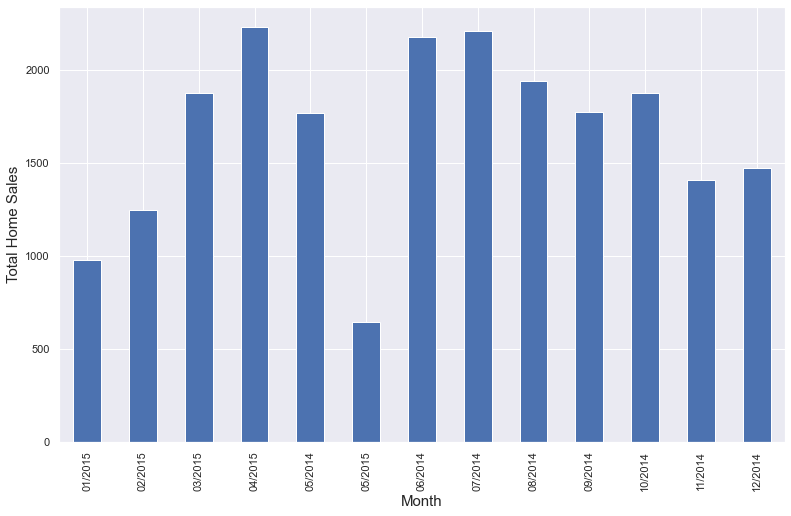

In [26]:
plt.figure(figsize = (13,8))
ax = re_df["date"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Total Home Sales', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks(ticks=range(12), label = months)
plt.show()

In [15]:
#re_df = re_df[re_df.date != "05/2015"]
#re_df = re_df[re_df.date != "01/2015"]

### dropping columns

In [ ]:
re_df.drop(['id'],axis=1, inplace=True)
re_df.drop(['yr_renovated'],axis=1, inplace=True)
#re_df.drop(['yr_built'],axis=1, inplace=True)
re_df.drop(['sqft_above'],axis=1, inplace=True)
re_df.drop(['sqft_lot'],axis=1, inplace=True)

### creating a new column "area"

area = []

for row in re_df['price']:
    if row < 300000:
        area.append('affordable area')
    elif row >= 300000 and row < 600000:
        area.append('medium priced area')
    elif row >= 600000 and row < 900000:
        area.append('expensive area')
    elif row >= 900000:  
        area.append('very expensive area')
    else:         
        area.append('Not_Rated')
        
re_df['area'] = area

area = []

for row in re_df['price']:
    if row < 250000:
        area.append('very affordable area')
    elif row >= 250000 and row < 500000:
        area.append('affordable area')
    elif row >= 500000 and row < 750000:
        area.append('medium priced area')
    elif row >= 750000 and row < 1000000:
        area.append('expensive area')
    elif row >= 1000000:  
        area.append('very expensive area')
    else:         
        area.append('not rated')
        
re_df['area'] = area

### Grouping Zipcodes by average price

In [ ]:
#step 1: zipcodes gruppieren und avg price ausgeben lassen
#step 2: gruppen sortieren nach avg price
    
grouped_zipcodes = re_df.groupby("zipcode")[["price"]].mean().sort_values(by="price", ascending=False)

#step 3: schwellwerte festlegen

very_affordable_area =list(grouped_zipcodes[grouped_zipcodes["price"]< 250000].index)
affordable_area = list(grouped_zipcodes[(grouped_zipcodes["price"]>= 250000) & (grouped_zipcodes["price"] < 500000)].index)
medium_priced_area = list(grouped_zipcodes[(grouped_zipcodes["price"]>= 500000) & (grouped_zipcodes["price"]< 750000)].index)
expensive_area = list(grouped_zipcodes[(grouped_zipcodes["price"]>= 750000) & (grouped_zipcodes["price"]< 1000000)].index)
very_expensive_area =list(grouped_zipcodes[grouped_zipcodes["price"]>=1000000].index)


#step 4: neue column erstellen mit zip code gruppen

area = []

for row in re_df['zipcode']:
    if row in very_affordable_area:
        area.append('very_affordable area')
    elif row in affordable_area:
        area.append('affordable area')
    elif row in medium_priced_area:
        area.append('medium priced area')
    elif row in expensive_area:
        area.append('expensive area')
    elif row in very_expensive_area:
        area.append('very expensive area')

re_df['area'] = area 


#step 1: zipcodes gruppieren und avg price ausgeben lassen
#step 2: gruppen sortieren nach avg price
    
grouped_zipcodes = re_df.groupby("zipcode")[["grade"]].mean().sort_values(by="grade", ascending=False)

#step 3: schwellwerte festlegen

very_affordable_area =list(grouped_zipcodes[grouped_zipcodes["grade"]< 3].index)
affordable_area = list(grouped_zipcodes[(grouped_zipcodes["grade"]>= 3) & (grouped_zipcodes["grade"] < 6)].index)
medium_priced_area = list(grouped_zipcodes[(grouped_zipcodes["grade"]>= 6) & (grouped_zipcodes["grade"]< 9)].index)
expensive_area = list(grouped_zipcodes[(grouped_zipcodes["grade"]>= 9) & (grouped_zipcodes["grade"]< 12)].index)
very_expensive_area =list(grouped_zipcodes[grouped_zipcodes["grade"]>=12].index)


#step 4: neue column erstellen mit zip code gruppen

area2 = []

for row in re_df['zipcode']:
    if row in very_affordable_area:
        area2.append('very_affordable area')
    elif row in affordable_area:
        area2.append('affordable area')
    elif row in medium_priced_area:
        area2.append('medium priced area')
    elif row in expensive_area:
        area2.append('expensive area')
    elif row in very_expensive_area:
        area2.append('very expensive area')

re_df['area2'] = area2


### removing duplicates

In [ ]:
re_df.drop_duplicates(inplace=True)

### dropping nan values

In [ ]:
#re_df.view.hist()
#re_df.dropna(inplace=True)
#re_df

### renaming "waterfront" column features 

In [ ]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [ ]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

### removing outliers

#### bedrooms

In [ ]:
sns.boxplot(re_df['bedrooms'])

In [ ]:
max(re_df['bedrooms'])

In [ ]:
#re_df = re_df[re_df.bedrooms != max(re_df['bedrooms'])]

re_df.loc[re_df['bedrooms'] == 33]

Based on the sqft_living we asume that there is typing error

In [ ]:
re_df.at[15856,'bedrooms'] = 3

#### bathrooms

In [ ]:
sns.boxplot(re_df['bathrooms'])

In [ ]:
re_df['bathrooms'].value_counts()

#re_df = re_df[re_df.bathrooms != max(re_df['bathrooms'])]
#re_df = re_df[re_df.bathrooms != 7.75]

#### sqft_lot

sns.boxplot(re_df['sqft_lot'])

max(re_df['sqft_lot'])

re_df.loc[re_df['sqft_lot'] == 1651359]

re_df.at[1717,'sqft_lot'] = 16513.59

#### price

In [ ]:
re_df = re_df[re_df['price'] < 4000000]

In [ ]:
re_df.to_excel(r'cleaned_dataframe.xlsx', index = False)

## Plot the Correlation Heatmap

In [ ]:
re_num = re_df[['sqft_living','sqft_living15','sqft_lot15','sqft_basement','price']]

corr = re_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Split Data into groups

In [ ]:
expensive_zipcodes= [98199, 98119, 98109, 98102, 98105, 98112, 98033, 98039, 98004, 98005, 98040, 98006, 98075]
expensive_areas = re_df[re_df['zipcode'].isin(expensive_zipcodes)]

In [ ]:
affordable_areas = re_df[~re_df['zipcode'].isin(expensive_zipcodes)]

## X Y split

In [ ]:
X=re_df.drop("price", axis=1)
y=re_df["price"]

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [ ]:
X_train_cat=X_train[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long','area']]
X_train_cat

X_test_cat=X_test[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long','area']]
X_test_cat

In [ ]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

In [ ]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [ ]:
X_train_num=X_train[['sqft_living','sqft_living15','sqft_lot15','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living','sqft_living15','sqft_lot15','sqft_basement']]
X_test_num

In [ ]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [ ]:
X_test_scaled=std_scaler.transform(X_test_num)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [ ]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### Quantile Transformer

In [ ]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_living15'] = qt.transform(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_living15'] = qt.transform(X_test_scaled['sqft_living15'].to_numpy().reshape(-1,1))

In [ ]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_lot15'] = qt.transform(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_lot15'] = qt.transform(X_test_scaled['sqft_lot15'].to_numpy().reshape(-1,1))

In [ ]:
pt = PowerTransformer().fit(y_train.to_numpy().reshape(-1,1))
y_train = pt.transform(y_train.to_numpy().reshape(-1,1))
y_test = pt.transform(y_test.to_numpy().reshape(-1,1))

## Concatination

In [ ]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [ ]:
X_train_con

##  Apply Linear Regression

### Modelling using Statsmodels

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

In [ ]:
predictions_test

In [ ]:
#display adjusted R-squared
print(model.rsquared_adj)

### Modeling using Scikit Learn

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

In [ ]:
model.coef_

In [ ]:
model.intercept_

Making prediction

In [ ]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_test = y_test.reshape(len(y_test))
y_pred = y_pred.reshape(len(y_pred))


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
X_test.shape[1]

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#### Feature Importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [ ]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

In [ ]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

In [ ]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

In [ ]:
re_df.hist(figsize=(12,12))